In [179]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv 
import seaborn as sns 


## Plotting of KPIs

In [ ]:
# #frame TP     FP     TN     FN
# 0	1970	17865	877444	24321
# csv is designed in the following way:
#frame TP     FP     TN     FN
# we calculate the accuracy by dividing the TP by the sum of TP, FP, FN

In [ ]:
def calculate_accuracy(tp, fp, tn, fn):
    return round(tp / (fp + tp + fn), 2)

In [ ]:
def plot_accuracy_over_time(df,path,video_name):
    # Read data from the CSV file

    # Calculate accuracy for each row
    df['accuracy'] = df.apply(lambda x: calculate_accuracy(x[1], x[2], x[3], x[4]), axis=1)
    
    # Add labels and title to the plot
    df.plot(x=0, y='accuracy', kind='line')
    plt.xlabel('Frame')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Time')
    plt.legend()

    # Save the plot to a PNG file
    plt.savefig(f'./result_plots/{path}/{video_name}.png',facecolor='w', edgecolor='w')

    # Show the plot
    plt.show()

In [ ]:
videos= [
 'Chicago',
 'Istanbul_2',
 'Istanbul_Bridge',
 'Los Angeles',
 'Moscow',
 'Seattle',
 'Busan_2',
 'Toronto',

 'Istanbul_3',
 'Norway',
 'Vaduz',
 'Zurich',
 'Tokyo Curved Right',
 'Red_Curve_Tokyo',

]

In [ ]:
for video in videos:
    df = pd.read_csv(f"./hyperautomation_KPIs/{video}.csv",  header=None)
    split_indices = df.index[df[0] == 0].tolist()
    split_indices.append(df.index[-1])
    df_list = [df.iloc[i:j,:] for i, j in zip(split_indices, split_indices[1:])]

    # Save each dataframe to a separate CSV file
    for runs, df in enumerate(df_list):
        plot_accuracy_over_time(df,"Hyperautomation", f'Hyperautomation - {video} - Run {runs}')

## KPI Aggregation 

In [ ]:
# get total 

In [136]:
def calculate_accuracy(tp, fp,  fn):
    return round(tp / (fp + tp + fn), 2)

In [ ]:
# num of frames per video 
# accuracy per frame / num of frames 

In [137]:
videos= [
 'Chicago',
 'Istanbul_2',
 'Istanbul_Bridge',
 'Los Angeles',
 'Moscow',
 'Seattle',
 'Busan_2',
 'Toronto',
 'Istanbul_3',
 'Norway',
 'Vaduz',
 'Zurich',
 'Tokyo Curved Right',
 'Red_Curve_Tokyo',

]

In [138]:
def get_accuracy(path,videos):
    accuracy = []
    frames = 0
    for video in videos:
      df = pd.read_csv(f"./{path}/{video}.csv",  header=None)
      df['accuracy'] = df.apply(lambda x: calculate_accuracy(x[1], x[2], x[4]), axis=1)
      accuracy.append((video,df['accuracy'].mean()))
      frames += df.shape[0]
    return accuracy, frames


In [189]:
def get_aggregate_accuracy(accuracy):
   total_acc= sum(item[1] for item in accuracy) / len(accuracy)
   total_acc = round((total_acc * 100), 2)
   
   return total_acc 




In [167]:
balance_accuracy, frames_general = get_accuracy("baseline_KPIs",videos)
balance_accuracy

[('Chicago', 0.5435915492957746),
 ('Istanbul_2', 0.6553784860557769),
 ('Istanbul_Bridge', 0.6259760956175299),
 ('Los Angeles', 0.6005),
 ('Moscow', 0.8866112956810631),
 ('Seattle', 0.5357081545064378),
 ('Busan_2', 0.8500829875518673),
 ('Toronto', 0.7544078947368421),
 ('Istanbul_3', 0.7539442231075698),
 ('Norway', 0.5036065573770493),
 ('Vaduz', 0.6471323529411765),
 ('Zurich', 0.7144813278008298),
 ('Tokyo Curved Right', 0.4811627906976745),
 ('Red_Curve_Tokyo', 0.7212624584717608)]

In [150]:
len(balance_accuracy)

14

In [174]:
print(f"Total Accuracy: {get_aggregate_accuracy(balance_accuracy)}")

Total Accuracy: 66.24 %


In [152]:
aggregate_accuracy = sum(item[1] for item in balance_accuracy) / len(balance_accuracy)
aggregate_accuracy

0.662417583845811

In [209]:
hyper_accuracy, frames_general = get_accuracy("hyperautomation_KPIs-used",videos)
hyper_accuracy


[('Chicago', 0.12873239436619718),
 ('Istanbul_2', 0.000796812749003984),
 ('Istanbul_Bridge', 0.9695238095238095),
 ('Los Angeles', 0.007576923076923077),
 ('Moscow', 0.8866112956810631),
 ('Seattle', 0.8460085836909869),
 ('Busan_2', 0.9694954128440368),
 ('Toronto', 0.29914473684210524),
 ('Istanbul_3', 0.6374501992031872),
 ('Norway', 0.6437295081967214),
 ('Vaduz', 0.16040441176470588),
 ('Zurich', 0.29294605809128627),
 ('Tokyo Curved Right', 0.3744518272425249),
 ('Red_Curve_Tokyo', 0.2961794019933555)]

In [210]:
frames_general

3713

In [181]:
print(f"Total Accuracy: {get_aggregate_accuracy(hyper_accuracy)}")

Total Accuracy: 46.52 %


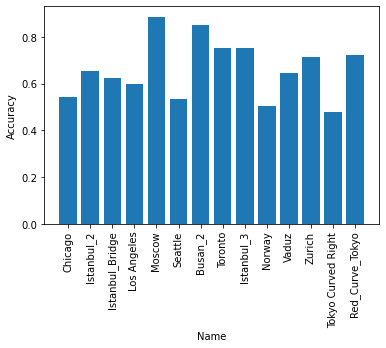

In [182]:
names, values = zip(*balance_accuracy)
 
 
plt.bar(names, values)
plt.xlabel('Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


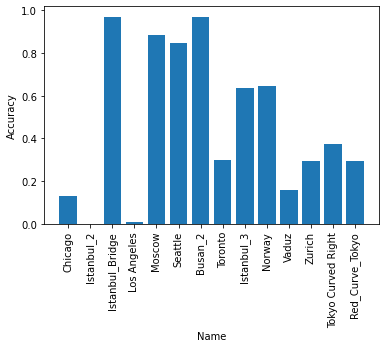

In [178]:
names, values = zip(*hyper_accuracy)
 
 
plt.bar(names, values)
plt.xlabel('Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

## For paper

In [183]:
# straight 
# curved 
straight = [ 'Chicago',
 'Istanbul_2',
 'Istanbul_Bridge',
 'Los Angeles',
 'Moscow',
 'Seattle',
 'Busan_2',
 'Toronto']
curve = [ 'Istanbul_3',
 'Norway',
 'Vaduz',
 'Zurich',
 'Tokyo Curved Right',
 'Red_Curve_Tokyo']


In [200]:
balance_accuracy_straight, frames_straight = get_accuracy("baseline_KPIs",straight)
balance_accuracy_straight

[('Chicago', 0.5435915492957746),
 ('Istanbul_2', 0.6553784860557769),
 ('Istanbul_Bridge', 0.6259760956175299),
 ('Los Angeles', 0.6005),
 ('Moscow', 0.8866112956810631),
 ('Seattle', 0.5357081545064378),
 ('Busan_2', 0.8500829875518673),
 ('Toronto', 0.7544078947368421)]

In [201]:
frames_straight

2125

In [202]:
hyper_accuracy_straight, frames_straight = get_accuracy("hyperautomation_KPIs-used",straight)
hyper_accuracy_straight


[('Chicago', 0.12873239436619718),
 ('Istanbul_2', 0.000796812749003984),
 ('Istanbul_Bridge', 0.9695238095238095),
 ('Los Angeles', 0.007576923076923077),
 ('Moscow', 0.8866112956810631),
 ('Seattle', 0.8460085836909869),
 ('Busan_2', 0.9694954128440368),
 ('Toronto', 0.29914473684210524)]

In [203]:
frames_straight

2103

In [204]:
print(f"Total Accuracy Baseline: {get_aggregate_accuracy(balance_accuracy_straight)}")
print(f"Total Accuracy Hyper: {get_aggregate_accuracy(hyper_accuracy_straight)}")

Total Accuracy Baseline: 68.15
Total Accuracy Hyper: 51.35


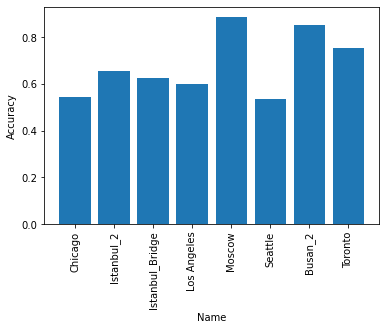

In [193]:
names, values = zip(*balance_accuracy_straight)
 
 
plt.bar(names, values)
plt.xlabel('Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

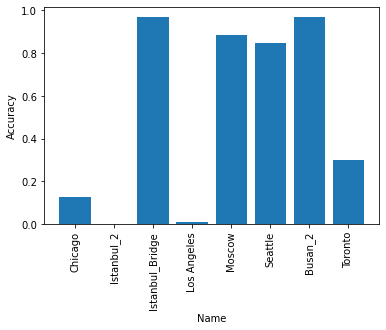

In [194]:
names, values = zip(*hyper_accuracy_straight)
 
 
plt.bar(names, values)
plt.xlabel('Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

In [205]:
baseline_curve, frames_curve = get_accuracy("baseline_KPIs",curve)
baseline_curve

[('Istanbul_3', 0.7539442231075698),
 ('Norway', 0.5036065573770493),
 ('Vaduz', 0.6471323529411765),
 ('Zurich', 0.7144813278008298),
 ('Tokyo Curved Right', 0.4811627906976745),
 ('Red_Curve_Tokyo', 0.7212624584717608)]

In [206]:
frames_curve

1610

In [207]:
hyper_accuracy_curve, frames_curve = get_accuracy("hyperautomation_KPIs-used",curve)
hyper_accuracy_curve

[('Istanbul_3', 0.6374501992031872),
 ('Norway', 0.6437295081967214),
 ('Vaduz', 0.16040441176470588),
 ('Zurich', 0.29294605809128627),
 ('Tokyo Curved Right', 0.3744518272425249),
 ('Red_Curve_Tokyo', 0.2961794019933555)]

In [208]:
frames_curve

1610

In [158]:
aggregate_accuracy_balance = sum(item[1] for item in baseline_curve) / len(baseline_curve)
aggregate_accuracy_hyper = sum(item[1] for item in hyper_accuracy_curve) / len(hyper_accuracy_curve)

In [195]:
print(f"Total Accuracy Baseline: {get_aggregate_accuracy(baseline_curve)}")
print(f"Total Accuracy Hyper: {get_aggregate_accuracy(hyper_accuracy_curve)}")

Total Accuracy Baseline: 63.69
Total Accuracy Hyper: 40.09
